### Problem Statement

Continuing with the same scenario, now that you have been able to successfuly predict each student GPA, now you will classify each Student based on they probability to have a successful GPA score.

The different classes are:

- Low     : Students where final GPA is predicted to be between: 0 and 2
- Medium  : Students where final GPA is predicted to be between: 2 and 3.5
- High    : Students where final GPA is predicted to be between: 3.5 and 5



### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns


### 2) Load Data

- You will use the same file from the previous activity (Student Performance Data)

In [53]:
data = pd.read_csv("Student_performance_data _.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 3) Add a new column called 'Profile' this column will have the following information

Based on the value of GPA for each student: 

- If GPA values between 0 and 2 will be labeled 'Low', 
- Values between 2 and 3.5 will be 'Medium', 
- And values between 3.5 and 5 will be 'High'.


In [55]:
data['Profile'] = pd.cut(data['GPA'], bins=[0, 2, 3.5, 5], labels=['Low', 'Medium', 'High'])

### 4) Use Matplotlib to show a Pie chart to show the percentage of students in each profile.
- Title: Students distribution of Profiles
- Graph Type: pie

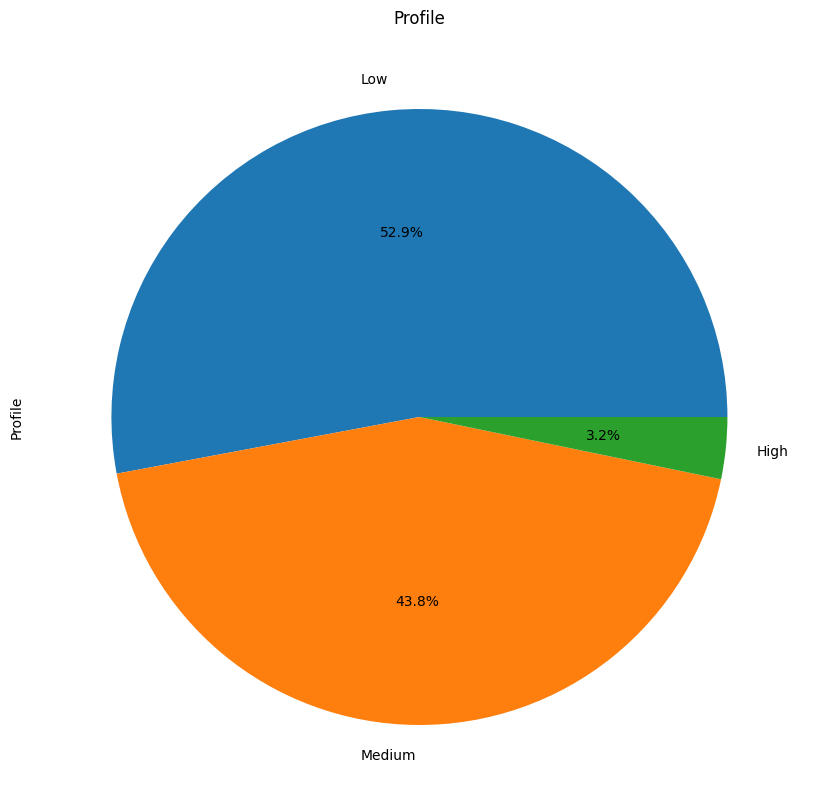

In [56]:
plt.figure(figsize=(10, 10))
data['Profile'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Profile')
plt.show()

### 5) Convert the Profile column into a Categorical Int

You have already created a column with three different values: 'Low', 'Medium', 'High'. These are Categorical values. But, it is important to notice that Neural Networks works better with numbers, since we apply mathematical operations to them.

Next you need to convert Profile values from Low, Medium and High, to 0, 1 and 2. IMPORTANT, the order does not matter, but make sure you always assign the same number to Low, same number to Medium and same number to High.

Make sure to use the fit_transform method from LabelEncoder.

In [57]:
# rename low, medium, high to 0, 1, 2
data['Profile'] = data['Profile'].replace({'Low': 0, 'Medium': 1, 'High': 2})

data = data.drop(['GPA'], axis=1)

# drop na
data.dropna(inplace=True)

# Profile to int
data['Profile'] = data['Profile'].astype(int)

In [58]:
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass,Profile
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0,1
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0,0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0,1
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,0.0,1
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,4.0,1
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,2.0,0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.0,0


### 6) Select the columns for your model.

Same as the last excersice we need a dataset for features and a dataset for label.

- Create the following dataset:
   - A dataset with the columns for the model.
   - From that data set generate the 'X' dataset. This dataset will have all the features (make sure Profile is NOT in this dataset)
   - Generate a second 'y' dataset, This dataset will only have our label column, which is 'Profile'.
   - Generate the Train and Test datasets for each X and y:
      - X_train with 80% of the data
      - X_test with 20% of the data
      - y_train with 80% of the data
      - y_test with 20% of the data

In [59]:
X = data.drop(['Profile'], axis=1)
y = data['Profile']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 7) All Feature datasets in the same scale.

Use StandardScaler to make sure all features in the X_train and X_test datasets are on the same scale.


Standardization transforms your data so that it has a mean of 0 and a standard deviation of 1. This is important because many machine learning algorithms perform better when the input features are on a similar scale.

Reason for Using StandardScaler:
- Consistent Scale: Features with different scales (e.g., age in years, income in dollars) can bias the model. StandardScaler ensures all features contribute equally.
- Improved Convergence: Algorithms like gradient descent converge faster with standardized data.
- Regularization: Helps in achieving better performance in regularization methods like Ridge and Lasso regression.


In [60]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 8. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention based on the X_train size and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with the number of different values in the y dataset, activation function = to sofmax

This last part of the output layer is super important, since we want to do a classification and not a regression, we will use activation functions that fits better a classification scenario.

In [61]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.nunique(), activation='softmax'))

C:\Users\ozner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 9. Compile your Neural Network
- Choose Adam as the optimizer
- And sparse_categorical_crossentropy as the Loss function
- Also add the following metrics: accuracy

In [62]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 10. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [63]:
data["Profile"].value_counts()

0    1258
1    1041
2      77
Name: Profile, dtype: int64

In [64]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6333 - loss: 0.7810 - val_accuracy: 0.9053 - val_loss: 0.3392
Epoch 2/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9240 - loss: 0.2652 - val_accuracy: 0.9289 - val_loss: 0.2277
Epoch 3/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9522 - loss: 0.1649 - val_accuracy: 0.9421 - val_loss: 0.1810
Epoch 4/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9580 - loss: 0.1279 - val_accuracy: 0.9447 - val_loss: 0.1509
Epoch 5/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9692 - loss: 0.0963 - val_accuracy: 0.9447 - val_loss: 0.1354
Epoch 6/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9756 - loss: 0.0835 - val_accuracy: 0.9500 - val_loss: 0.1300
Epoch 7/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9796 - loss: 0.0706 - val_accuracy: 0.9579 - val_loss: 0.1184
Epoch 8/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9913 - loss: 0.0451 - val_accuracy: 0.

### 11. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Accuracy and the Validation Accuracy
   - X Label = Epochs
   - Y Label = Accuracy
   - Title = Model Accuracy over Epochs
- In a second graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Model Loss over Epochs

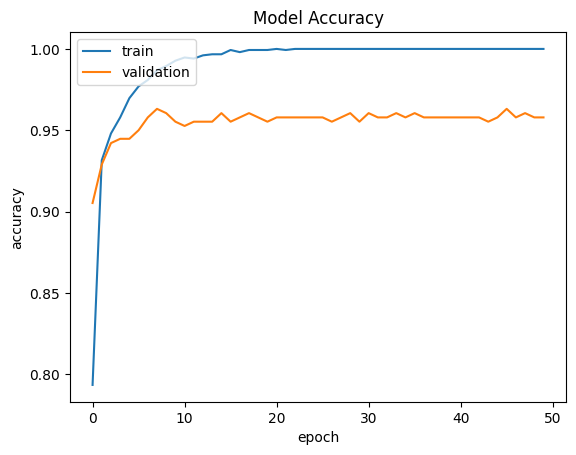

In [65]:
# show the history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 12. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

The model stops leaning after 30 epochs becasue the loss functions stops decreasing in training and validation datasets. It remains almost constant.

In [66]:
accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy[1]}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9430 - loss: 0.3307  
Accuracy: 0.9516806602478027


The results of accuracy are pretty good.

### 13. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- Replace the 'Low', 'Medium' and 'High' to your actual and predicted values.
- How good was your model?

In [67]:
y_pred = model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [68]:
# print the predicted values and the actual values
predicted_df = pd.DataFrame(y_pred, columns=['Low', 'Medium', 'High'])
predicted_df['Predicted'] = predicted_df.idxmax(axis=1)
predicted_df['Actual'] = y_test.values
predicted_df

,Low,Medium,High,Predicted,Actual
0,5.461995e-08,9.999937e-01,6.313496e-06,Medium,1
1,1.452621e-11,1.000000e+00,5.824401e-08,Medium,1
2,5.396351e-10,9.999636e-01,3.634028e-05,Medium,1
3,1.000000e+00,2.940365e-14,1.163195e-19,Low,0
4,1.000000e+00,1.734237e-15,1.330436e-24,Low,0
...,...,...,...,...,...
471,3.652835e-06,9.999954e-01,9.520978e-07,Medium,1
472,1.000000e+00,8.925256e-11,6.579293e-21,Low,0
473,2.610573e-12,1.000000e+00,1.608932e-08,Medium,1
474,1.729590e-07,9.999999e-01,7.418996e-11,Medium,1


### 14. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction 
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Model 2:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

Changes in the architecture of the model 2:
- The model has 2 hidden layers with 1 dense with 32 with 2 droputs after each dense layer.
- The third hidden layer has just 16 neurons.
- The rest of the process is the same as the original model.

Epoch 1/50


C:\Users\ozner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4782 - loss: 1.0322 - val_accuracy: 0.7342 - val_loss: 0.7115
Epoch 2/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7263 - loss: 0.6643 - val_accuracy: 0.8158 - val_loss: 0.5060
Epoch 3/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7753 - loss: 0.5666 - val_accuracy: 0.8526 - val_loss: 0.4184
Epoch 4/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8372 - loss: 0.4886 - val_accuracy: 0.8921 - val_loss: 0.3396
Epoch 5/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8608 - loss: 0.3975 - val_accuracy: 0.9026 - val_loss: 0.2999
Epoch 6/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8834 - loss: 0.3334 - val_accuracy: 0.9105 - val_loss: 0.2743
Epoch 7/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8971 - loss: 0.3152 - val_accuracy: 0.9132 - val_loss: 0.2496
Epoch 8/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9069 - loss: 0.2887 - val_accuracy: 0.9237 - val_

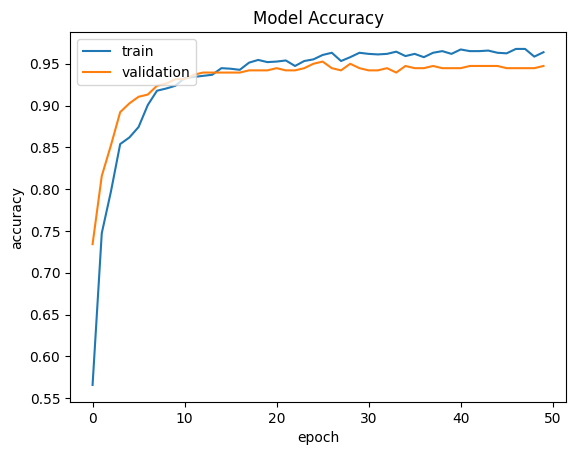

In [69]:
model_2 = Sequential()
model_2.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(y_train.nunique(), activation='softmax'))

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_2 = model_2.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# show the history
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [70]:
accuracy_2 = model_2.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy_2[1]}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9280 - loss: 0.1679  
Accuracy: 0.9390756487846375


#### Model 3:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

Changes in the architecture of the model 3:
- The model has 4 hidden layers with 2 dense with 32.
- One of the hidden layers has 16 neurons and the other has 64 neurons.
- Increased the number of epochs to 100.
- The rest of the process is the same as the original model.

Epoch 1/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6216 - loss: 0.7981 - val_accuracy: 0.8605 - val_loss: 0.4252
Epoch 2/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8957 - loss: 0.3111 - val_accuracy: 0.8895 - val_loss: 0.3052
Epoch 3/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9260 - loss: 0.2134 - val_accuracy: 0.9158 - val_loss: 0.2440
Epoch 4/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9407 - loss: 0.1549 - val_accuracy: 0.9132 - val_loss: 0.2141
Epoch 5/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9498 - loss: 0.1431 - val_accuracy: 0.9263 - val_loss: 0.2067
Epoch 6/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9676 - loss: 0.0915 - val_accuracy: 0.9184 - val_loss: 0.1972
Epoch 7/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9748 - loss: 0.0755 - val_accuracy: 0.9237 - val_loss: 0.1927
Epoch 8/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9830 - loss: 0.0558 - val_accu

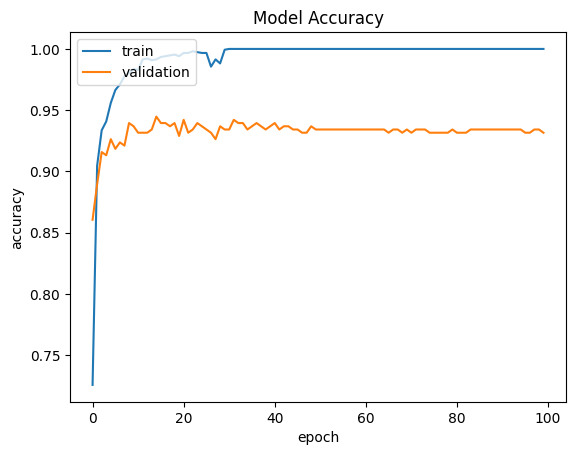

In [71]:
model_3 = Sequential()
model_3.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(16, activation='relu'))
model_3.add(Dense(y_train.nunique(), activation='softmax'))

model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_3 = model_3.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

# show the history
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [72]:
accuracy_3 = model_3.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy_3[1]}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9427 - loss: 0.6577  
Accuracy: 0.9474790096282959


Comparison of the models:
- Original: accuracy of 96.4% - best model
- Model 2: accuracy of 94.3%
- Model 3: accuracy of 94.1%

The original model seems to generalize better than the other models. The original model has the best accuracy.